<a href="https://colab.research.google.com/github/Reefavibes/AI-Research/blob/main/Notebook_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(-3,3,100)

In [7]:
y = x**2 + 2

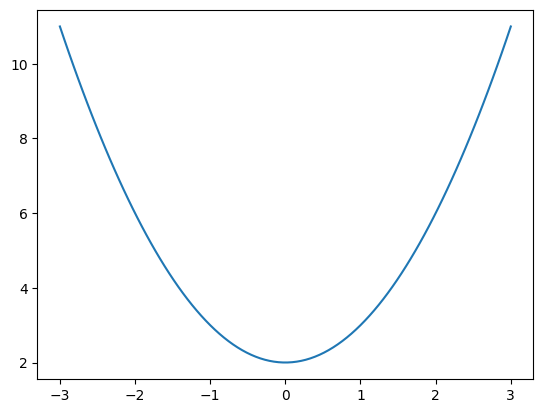

In [8]:
plt.plot(x,y)

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [9]:
13/3

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [10]:
def f(x):
    y = x**2 + 2
    return y

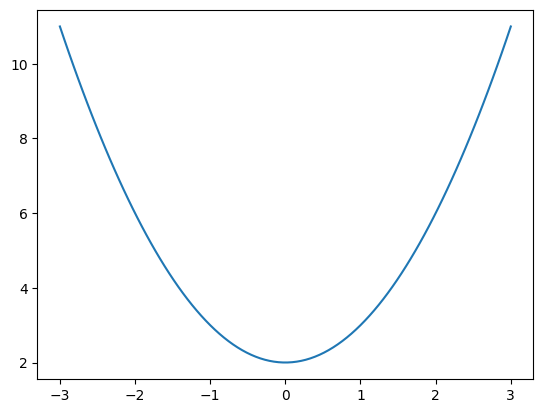

In [11]:
plt.plot(x,f(x))

In [12]:
M = 10

In [13]:
a = 1
b = 2

In [14]:
x = a + (b-a)*np.random.random()

In [15]:
x

1.9743607175022384

In [16]:
y = M*np.random.random()

In [17]:
x,y,f(x)

(1.9743607175022384, 0.9002397043381849, 5.8981002428159535)

In [18]:
y < f(x)

True

In [19]:
# Define the number of random points to be generated
N = 100_000

# Initialize the sum for counting points below the function f(x)
S = 0

# Iterate over N points
for i in range(N):

    # Generate a random x-coordinate within the interval [a, b]
    x = a + (b - a) * np.random.random()

    # Generate a random y-coordinate within the interval [0, M]
    y = M * np.random.random()

    # Increment S if the randomly generated point (x, y) is below the curve of the function f(x)
    S += (y < f(x))

# Calculate the approximate area under the curve f(x) in the interval [a, b]
# This is done using the Monte Carlo method: ratio of points under the curve to total points
# multiplied by the area of the rectangle enclosing the function f(x)
M * (b - a) * (S / N)

4.3362

In [20]:
def f(x):
    # Define the function f(x) which computes the value of y
    # based on a given input x

    # Calculate y as the square of x plus 2
    y = x**2 + 2

    # Return the computed value of y
    return y

In [38]:
def monte_carlo_integrate(f, a, b, N):
    # Overwrites the parameter N with a fixed value 100000.
    # This should be avoided to make the function more flexible.
    N = 100000

    # Initialize the sum for counting points below the curve f(x).
    S = 0

    # Iterate over N points.
    for i in range(N):
        # Generate a random x-coordinate within the interval [a, b].
        x = a + (b - a) * np.random.random()

        # Generate a random y-coordinate within the interval [0, M].
        # Issue: M is not defined in the function. It needs to be passed as an argument
        # or calculated inside the function.
        y = M * np.random.random()

        # Increment S if the randomly generated point (x, y) is below the curve of the function f(x).
        S += (y < f(x))

    # Returns the approximate area under the curve f(x) in the interval [a, b].
    # Same issue: M is not defined.
    return M * (b - a) * (S / N)

In [22]:
monte_carlo_integrate(f,1,2,1000)

4.3345

In [23]:
from sympy import *

In [24]:
x = Symbol('x')

In [25]:
x

x

In [26]:
integrate(x**2 + 2, (x,1,2))

13/3

In [27]:
13/3

4.333333333333333

In [28]:
integrate(x**3 + 3, (x,1,2))

27/4

In [29]:
27/4

6.75

In [30]:
x = 0

In [31]:
def f(x):
    y = x**3 + 3
    return y

In [32]:
monte_carlo_integrate(f,1,2,1000000)

6.6983999999999995

In [39]:
# Define the number of random points to be generated
N = 2000

# Initialize the sum for counting points below the curve f(x)
S = 0

# Initialize an array Z to store the approximation value after each iteration
Z = np.zeros(N,)

# Iterate over N-1 points (starting from 1 to N-1)
for i in range(1, N):

    # Generate a random x-coordinate within the interval [a, b]
    x = a + (b - a) * np.random.random()

    # Generate a random y-coordinate within the interval [0, M]
    y = M * np.random.random()

    # Increment S if the randomly generated point (x, y) is below the curve of the function f(x)
    S += (y < f(x))

    # Store the current approximation of the integral in the array Z
    # The approximation is calculated as the ratio of points under the curve to the total points
    # multiplied by the area of the rectangle enclosing the function f(x)
    # Note: We divide S by i (not N) to get the approximation at the ith iteration
    Z[i] = M * (b - a) * (S / i)

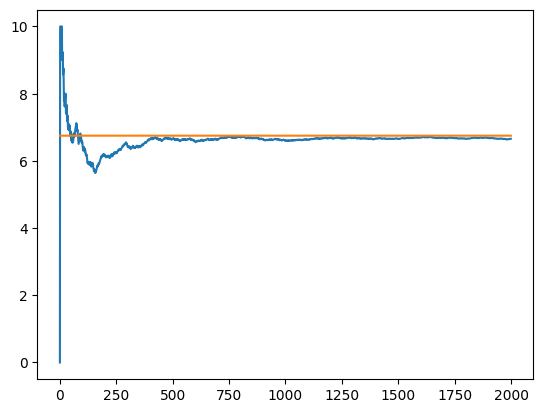

In [34]:
plt.plot(Z)
plt.plot(6.75*np.ones(Z.shape))

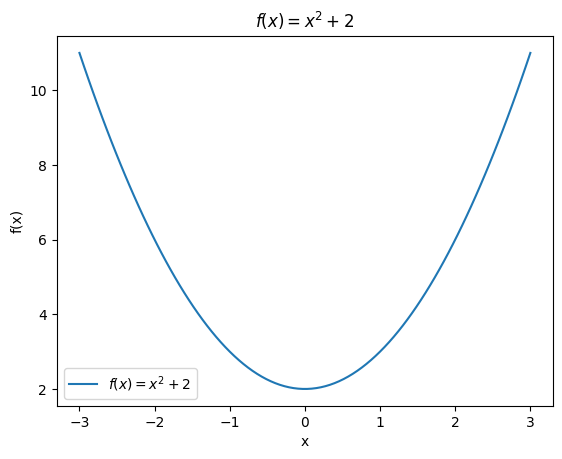

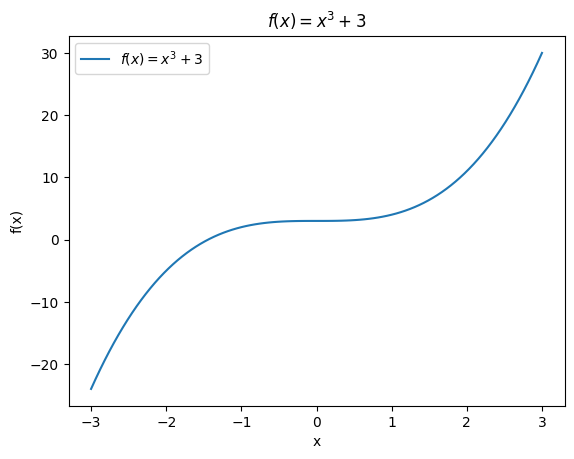

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3218
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.7593000000000005


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

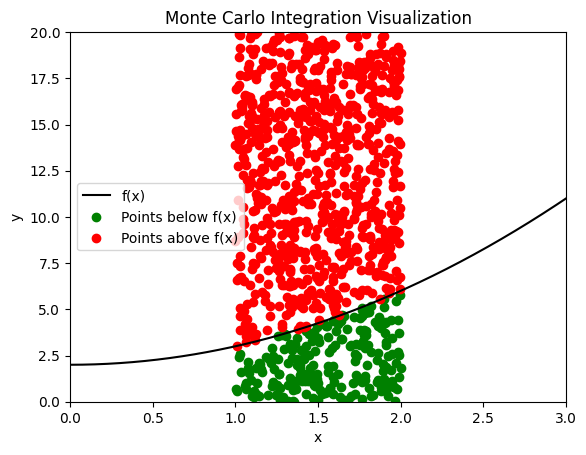

In [36]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

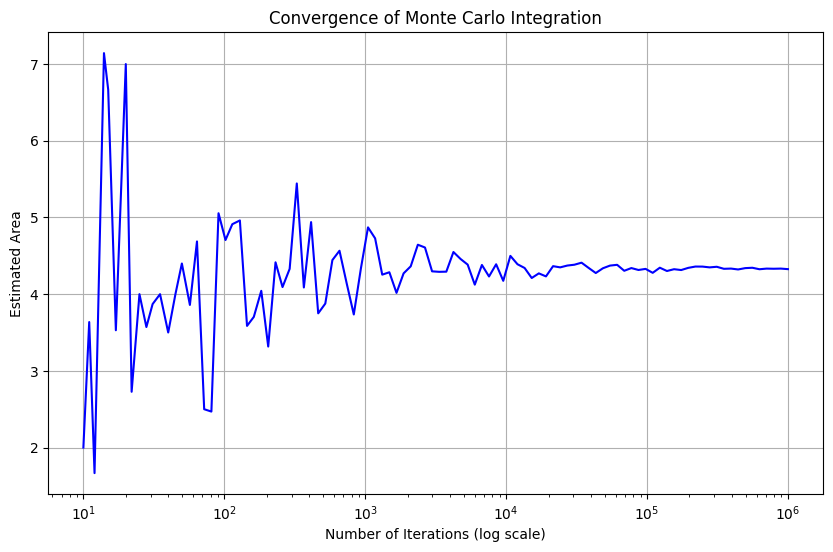

In [37]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()